<a href="https://colab.research.google.com/github/DouglasFrancoDS/Data_Sciense/blob/master/PROJETO_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analisando a Violência no Rio de Janeiro

![Rio de Janeiro](https://wallpaperstock.net/rio-de-janeiro-wallpapers_46831_1920x1080.jpg)

Um dos maiores destinos do turismo no Brasil o estado possui uma população de aproximadamente 16.370.000 pessoas, a terceira maior do país, habitando em uma área de 43.780 km², uma das menores do Brasil. Isso significa dizer que o Rio possui elevadas densidades demográficas, cerca de 366 habitantes por quilômetro quadrado com um total de 92 municípios.  O Rio de Janeiro representa a segunda maior economia do Brasil, com um dos espaços mais industrializados do país.

Mesmo com todos esses números, um motivo que pode levantar dúvidas para visitantes de outros países é a segurança da cidade, mas qual será que é a verdade sobre este assunto?

## Obtenção dos Dados
A fonte de dados para esse estudo será o [Instituto de Segurança Pública do Rio de Janeiro (ISP)](https://www.ispdados.rj.gov.br).
Lá estão acesso a bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro.



### Importando os dados


In [0]:
# importa os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sea
import math

df = pd.read_csv('https://raw.githubusercontent.com/DouglasFrancoDS/Data_Sciense/master/arquivos/DOMensalEstadoDesde1991.csv',sep=';')

## Análise Inicial dos Dados

>Agora que possuímos nosso conjunto de dados disponível vamos começar a explora-lo para entender melhor as características das informações nele contidas.


In [0]:
# verificar o tamanho do DataFrame (Linhas x Colunas)
df.shape


(349, 58)

In [0]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mo

In [0]:
# ver os tipos das variáveis
df.dtypes


vano                           int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

In [0]:
# ver as 5 primeiras entradas do dataset
df.head()

In [2]:
#ver os valores faltantes das colunas
df.isnull().sum()/ df.shape[0]

vano                          0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_transeunte              0.0
roubo_em_coletivo             0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_celular                 0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular 

No comando acima não foi acusado nenhum dado em vazio. Porém analisando os dados fica visivel que falta dados e que esse dataframe precisa ser tratado.

In [4]:
# Tratando os valores setados como espaço em branco para NaN
df = df.replace(r'^\s+$', np.nan, regex=True) 
df.head() # conferindo novamente se o comando anterior funcionou.


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


In [5]:
#ver os valores faltantes das colunas
df.isnull().sum()/ df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.275072
latrocinio                    0.000000
hom_por_interv_policial       0.240688
letalidade_violenta           0.000000
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.412607
hom_culposo                   0.240688
lesao_corp_culposa            0.275072
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.412607
roubo_celular                 0.309456
roubo_conducao_saque          0.412607
roubo_apos_saque              0.412607
roubo_bicicleta               0.790831
outros_roubos                 0.000000
total_roubos             

>Agora que tratamos os dados temos acesso a real quantidade de valores faltantes. Algumas até além dos **50%** dos valores faltantes.





## Informações Estatísticas da Violência no Rio de Janeiro
Para exemplificar um estudo desse tipo vamos acompanhar informações sobre roubos e furtos de veiculos. Utilizando a formula básica abaixo listaremos uma série de gráficos que nos ajudaram a observar melhor o resultado durante os anos.

  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$




In [45]:
newdf = df.groupby(['vano']).sum();
newdf['porcentagem_recuperacao'] = 'NaN';

for index, row in newdf.iterrows():
    newdf.loc[index,'porcentagem_recuperacao'] =  round((row.recuperacao_veiculos / (row.furto_veiculos + row.roubo_veiculo) *100),2);
    newdf.loc[index,'quantidade_furto_roubo_dia'] = math.ceil((row.furto_veiculos + row.roubo_veiculo)/365);

newdf2 = pd.DataFrame(newdf, columns=['roubo_veiculo','furto_veiculos','recuperacao_veiculos','porcentagem_recuperacao','quantidade_furto_roubo_dia']);
newdf2.head(newdf2.shape[0])

,roubo_veiculo,furto_veiculos,recuperacao_veiculos,porcentagem_recuperacao,quantidade_furto_roubo_dia
vano,,,,,
1991,16452,23979,9890,24.46,111.0
1992,24502,27619,11246,21.58,143.0
1993,24790,26897,11619,22.48,142.0
1994,27470,26231,16030,29.85,148.0
1995,23676,21928,17622,38.64,125.0
1996,18367,20126,11151,28.97,106.0
1997,19576,21834,10630,25.67,114.0
1998,21519,21309,12161,28.39,118.0
1999,29666,20523,15811,31.5,138.0


No ano de 2019 tivemos:

*   **39749** roubos.
*   **15595** furtos.
*   **26863** recuperações.


O que nos dá uma taxa de **48.54 %** e uma média de 152 casos por dia.


## Visualização de Dados

Hora mais esperada do estudo. Gráficos! Vão nos permitir entender melhor o que de fato está acontencedo.


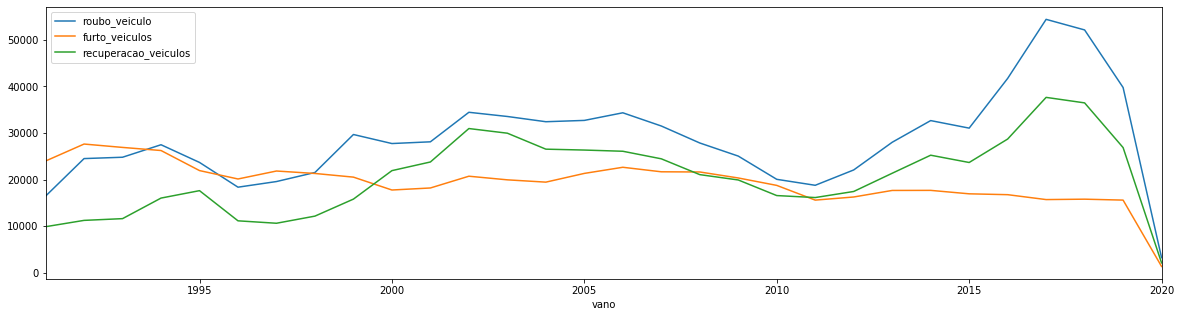

In [0]:
newdf2.plot(figsize=(20,5));

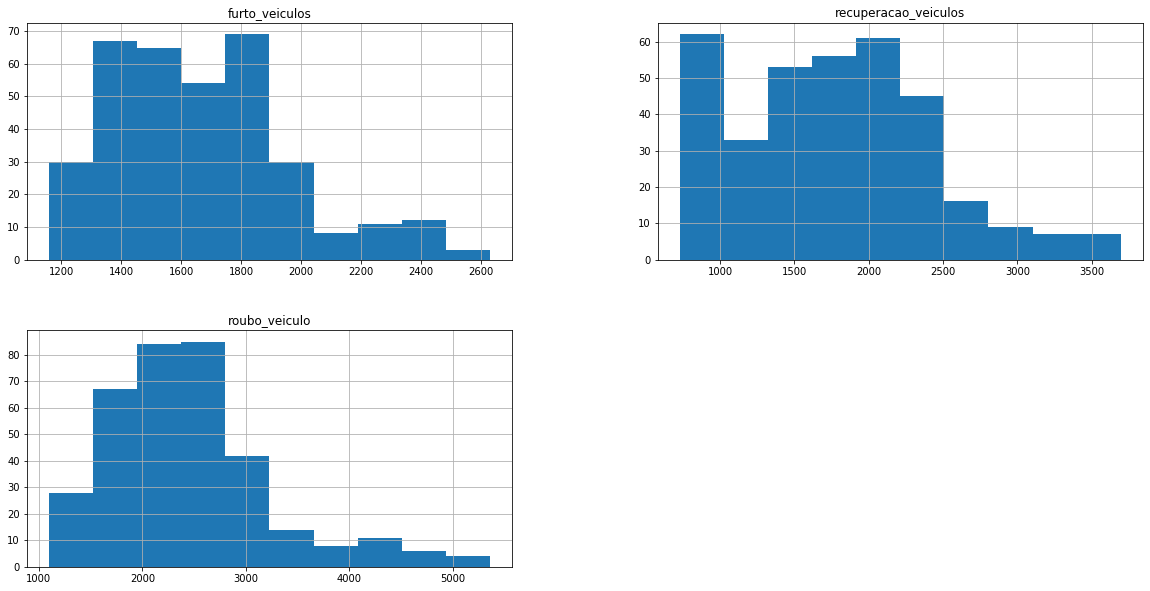

In [32]:
df[['roubo_veiculo','furto_veiculos', 'recuperacao_veiculos']].hist(figsize=(20,10));

> Outra informação bem interessante que temos é a quantidade de furtos e roubos relatados. Considerando todos os tipos e não somente os de veículos.

In [49]:
total_furtos_roubos = pd.DataFrame(newdf, columns=['total_furtos','total_roubos']);
total_furtos_roubos.head(total_furtos_roubos.shape[0])

,total_furtos,total_roubos
vano,,
1991,77211,42784
1992,82646,52172
1993,76668,48949
1994,69491,53958
1995,59986,49271
1996,61078,46507
1997,71797,55491
1998,76387,62368
1999,80007,76523


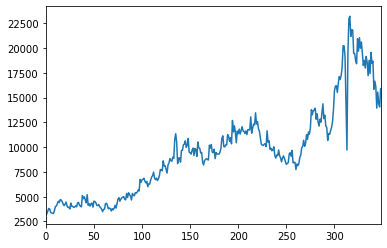

In [44]:
df.total_roubos.plot();

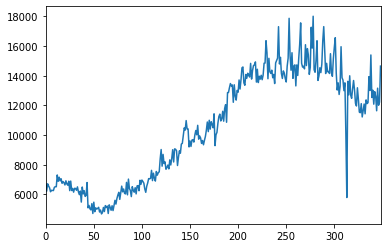

In [52]:
df.total_furtos.plot();

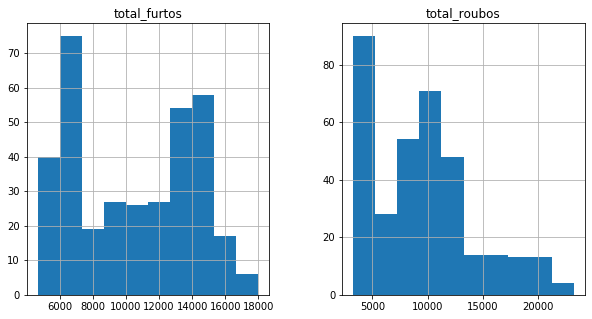

In [58]:
df[['total_furtos','total_roubos']].hist(figsize=(10,5));

## Conclusão

Com nossa análise inicial é possivel concluir que o Estado do Rio de Janeiro ainda possui altos indices de violência. Considerando o ano de 2019 tivemos  uma média de **152** casos por dia de furtos, roubos de veiculos e apenas **48.54%** de recuperação dos veículos. 

E com uma quantidade crescente de ocorrências fechando o ano com **199.347** furtos e **154.521** roubos de diversas modalidades.

Para uma conclusão mais assertiva recomendo que seja feita uma análise mais completa sobre cada tipo de crime, levando em consideração até mesmo quantidade populacional.





